### Importing Modules (p.44)

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The NumPy Array Object (p.44)

In [2]:
# an ndarray instance
# using a nested Python list
data = np.array([
    [1, 2], 
    [3, 4], 
    [5, 6]
])

In [3]:
type(data)

numpy.ndarray

In [4]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
data.ndim

2

In [6]:
data.shape

(3, 2)

In [7]:
data.size

6

In [8]:
# all elements in an array have same data type
# homogeneous data
data.dtype

dtype('int64')

In [9]:
data.nbytes

48

In [10]:
data.itemsize

8

In [11]:
data.itemsize*data.size

48

```
size : int
    Number of elements in the array.

itemsize : int
    Length of one array element in bytes.

nbytes : int
    Total bytes consumed by the elements of the array.
```
[Source : numpy.org](https://numpy.org/doc/1.16/reference/generated/numpy.ndarray.html)


#### Data Types (p.46)

In [12]:
np.array([1, 2, 3], dtype=np.int)

array([1, 2, 3])

In [13]:
np.array([1, 2, 3], dtype=np.float)

array([1., 2., 3.])

In [14]:
np.array([1, 2, 3], dtype=np.complex)

array([1.+0.j, 2.+0.j, 3.+0.j])

In [15]:
data = np.array([1, 2, 3], dtype=np.float)
data

array([1., 2., 3.])

In [16]:
data.dtype

dtype('float64')

In [17]:
data = np.array(data, dtype=np.int)

In [18]:
data.dtype

dtype('int64')

In [19]:
data

array([1, 2, 3])

In [20]:
data = np.array([1, 2, 3], dtype=np.float)
data

array([1., 2., 3.])

In [21]:
data.astype(np.int)

array([1, 2, 3])

In [22]:
# same as following
# d1 = np.array([1, 2, 3], dtype=np.float64)
# d1 = np.array([1, 2, 3], dtype='float64')
# https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html#data-types
# https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.dtypes.html#specifying-and-constructing-data-types
d1 = np.array([1, 2, 3], dtype=float)

In [23]:
# same as following
# d2 = np.array([1, 2, 3], dtype=np.complex).itemsize
# d2 = np.array([1, 2, 3], dtype='complex').itemsize
d2 = np.array([1, 2, 3], dtype=complex)

In [24]:
d1 + d2

array([2.+0.j, 4.+0.j, 6.+0.j])

In [25]:
(d1 + d2).dtype

dtype('complex128')

In [26]:
np.sqrt(np.array([-1, 0, 1]))

/Users/geeyeol/.pyenv/versions/3.7.1/envs/python3-staging/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([nan,  0.,  1.])

In [27]:
np.sqrt(np.array([-1, 0, 1]), dtype=complex)

array([0.+1.j, 0.+0.j, 1.+0.j])

In [28]:
data = np.array([1, 2, 3], dtype=complex)
data

array([1.+0.j, 2.+0.j, 3.+0.j])

In [29]:
data.real

array([1., 2., 3.])

In [30]:
data.imag

array([0., 0., 0.])

#### Order of Array Data in Memory (p.49)

In [31]:
# multidimensional arrays are stored contiguously
# e.g. two-dimensional array
# row-major format ('C') : store the rows after each other,
# column-major format ('F') : store the columns one after another

### Creating Arrays (p.50)

#### Arrays Created from Lists and Other Array-Like Objects (p.52)

In [32]:
data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [33]:
data.ndim

1

In [34]:
data.shape

(4,)

In [35]:
data = np.array([
    [1, 2],
    [3, 4]
])
data

array([[1, 2],
       [3, 4]])

In [36]:
data.ndim

2

In [37]:
data.shape

(2, 2)

#### Arrays Filled with Constant Values (p.52)

In [38]:
# data type defaults to float64
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
np.ones(4)

array([1., 1., 1., 1.])

In [40]:
data= np.ones(4)

In [41]:
data.dtype

dtype('float64')

In [42]:
data = np.ones(4, dtype=np.int64)

In [43]:
data.dtype

dtype('int64')

In [44]:
x1 = 5.4 * np.ones(10)

In [45]:
# more efficient because it
# avoids the multiplication
x2 = np.full(10, 5.4)

In [46]:
# comparison1
%timeit 5.4 * np.ones(10)
%timeit np.full(10, 5.4)

2.62 µs ± 56.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.61 µs ± 87.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [47]:
# comparison2
def measure_execution_time(f, n):

    sample = [10**x for x in range(n)]
    result = []

    for i in sample:
    
        start = time.time()
        f(i)
        end = time.time()
        execution_time = end-start
        result.append(execution_time)
    
    
    return result

def compare_execution_time(n):
    
    f_one = lambda x : 5.4 * np.ones(x)
    f_full = lambda x : np.full(x, 5.4)
    
    one_result = measure_execution_time(f_one, n)
    full_result = measure_execution_time(f_full, n)

    plt.xlabel("number of elements in 1-d array (10^x)")
    plt.ylabel("seconds elapsed")
    plt.plot(range(n), one_result, 'o', label='np.one')
    plt.plot(range(n), full_result, 'o', label='np.full')
    plt.legend()
    plt.show();

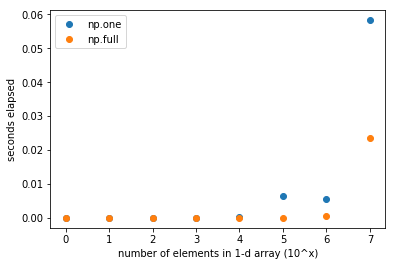

In [48]:
# passing large number can cause OOM
compare_execution_time(8)

In [49]:
# returns an array of uninitialized (arbitrary) data
x1 = np.empty(5)
x1

array([ 1. ,  2. ,  2.5,  5. , 10. ])

In [50]:
x1.fill(3.0)
x1

array([3., 3., 3., 3., 3.])

In [51]:
x2 = np.full(5, 3.0)
x2

array([3., 3., 3., 3., 3.])

#### Arrays Filled with Incremental Sequences (p.54)

In [52]:
# start <= x < end
np.arange(0.0, 10, 1)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [53]:
# start <= x <= end
# recommend when increment is a noninteger
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

#### Arrays Filled with Logarithmic Sequences (p.54)

In [54]:
# logarithmic increment
# start = 10^0
# end = 10^2
np.logspace(0, 2, 5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

#### Meshgrid Arrays (p.55)

In [55]:
x = np.array([-1, 0, 1])
y = np.array([-2, 0, 2])
X, Y = np.meshgrid(x, y)

In [56]:
X

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [57]:
Y

array([[-2, -2, -2],
       [ 0,  0,  0],
       [ 2,  2,  2]])

In [58]:
Z = (X + Y) ** 2
Z

array([[9, 4, 1],
       [1, 0, 1],
       [1, 4, 9]])

#### Creating Uninitialized Arrays (p.56)

In [59]:
# create an array without init process
# recommended when init takes place later
# to save some memory
# but np.zeros can be safer due to arbitrary values
np.empty(3, dtype=np.float)

array([-2.31584178e+077, -2.00389488e+000,  9.88131292e-324])

#### Creating Arrays with Properties of Other Arrays (p.56)

In [60]:
def f(x):
    y = np.ones_like(x)
    return x+y

In [61]:
x1

array([3., 3., 3., 3., 3.])

In [62]:
f(x1)

array([4., 4., 4., 4., 4.])

#### Creating Matrix Arrays (p.57)

In [63]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [64]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [65]:
np.eye(3, k=1)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [66]:
np.eye(3, k=-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [67]:
data = np.arange(0, 20, 5)
np.diag(data)

array([[ 0,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 15]])

### Indexing and Slicing (p.58)

#### One-Dimensional Arrays (p.58)

In [68]:
a = np.arange(0, 11)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [69]:
a[0]

0

In [70]:
a[-1]

10

In [71]:
a[4]

4

In [72]:
a[1:-1]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
a[1:-1:2]

array([1, 3, 5, 7, 9])

In [74]:
a[:5]

array([0, 1, 2, 3, 4])

In [75]:
a[-5:]

array([ 6,  7,  8,  9, 10])

In [76]:
a[::-2]

array([10,  8,  6,  4,  2,  0])

#### Multidimensional Arrays (p.60)

In [77]:
f = lambda m, n : n + 10 * m
A = np.fromfunction(f, (6, 6), dtype=int)
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [78]:
A[:, 1]

array([ 1, 11, 21, 31, 41, 51])

In [79]:
A[1, :]

array([10, 11, 12, 13, 14, 15])

In [80]:
A[:3, :3]

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [81]:
A[3:, :3]

array([[30, 31, 32],
       [40, 41, 42],
       [50, 51, 52]])

In [82]:
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [83]:
A[1::2, 1::3]

array([[11, 14],
       [31, 34],
       [51, 54]])

#### Views (p.62)

In [84]:
# extracted subarrays are views of original array
B = A[1:5, 1:5]
B

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])

In [85]:
# data of original array is dependent on that of view
# because they're pointing to the same data in memory
B[:, :] = 0
A

array([[ 0,  1,  2,  3,  4,  5],
       [10,  0,  0,  0,  0, 15],
       [20,  0,  0,  0,  0, 25],
       [30,  0,  0,  0,  0, 35],
       [40,  0,  0,  0,  0, 45],
       [50, 51, 52, 53, 54, 55]])

In [86]:
# shallow copy
# equivalent to np.array(..., copy=True)
C = B[1:3, 1:3].copy()
C

array([[0, 0],
       [0, 0]])

In [87]:
C[: :] = 1
C

array([[1, 1],
       [1, 1]])

In [88]:
B

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

#### Fancy Indexing and Boolean-Values Indexing (p.63)

In [89]:
A = np.linspace(0, 1, 11)
A

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [90]:
fancy = np.array([0, 2, 4])
# returns an independent array
A[fancy]

array([0. , 0.2, 0.4])

In [91]:
A[[0, 2, 4]]

array([0. , 0.2, 0.4])

In [92]:
boolean = A > 0.5
# returns an independent array
A[boolean]

array([0.6, 0.7, 0.8, 0.9, 1. ])

In [93]:
A = np.arange(10)
indices = [2, 4, 6]
B = A[indices]
B[0] = -1
B

array([-1,  4,  6])

In [94]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
A[indices] = -1

In [96]:
A

array([ 0,  1, -1,  3, -1,  5, -1,  7,  8,  9])

In [97]:
B

array([-1,  4,  6])

In [98]:
A = np.arange(10)
B = A[A > 5]
B[0]= -1
B

array([-1,  7,  8,  9])

In [99]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
A[A > 5] = -1

In [101]:
A

array([ 0,  1,  2,  3,  4,  5, -1, -1, -1, -1])

In [102]:
B

array([-1,  7,  8,  9])

### Reshaping and Resizing (p.66)

In [103]:
# reshaping doesn't change original data
# instead, it changes strides attribute
data = np.array([
    [1, 2],
    [3, 4]
])
np.reshape(data, (1, 4))

array([[1, 2, 3, 4]])

In [104]:
# produces a view of the original array
data.reshape(4)

array([1, 2, 3, 4])

In [105]:
# produces a view of the original array
data = np.array([
    [1, 2],
    [3, 4]
])
data.ravel()

array([1, 2, 3, 4])

In [106]:
# same as np.ravel
# but returns a copy of the original array
data.flatten()

array([1, 2, 3, 4])

In [107]:
data.flatten().shape

(4,)

In [108]:
data = np.arange(0, 5)
column = data[:, np.newaxis]
data

array([0, 1, 2, 3, 4])

In [109]:
column

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [110]:
# same as above
np.expand_dims(data, axis=1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [111]:
row = data[np.newaxis, :]
row

array([[0, 1, 2, 3, 4]])

In [112]:
# same as above
np.expand_dims(data, axis=0)

array([[0, 1, 2, 3, 4]])

In [113]:
data = np.arange(5)

In [114]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [115]:
# returns one-dimensional array of (5, )
np.hstack((data, data, data))

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [116]:
# returns one-dimensional array of (1, 5)
data = data[:, np.newaxis]
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

### Vectorized Expressions (p.70)

#### Arithmetic Operations (p.72)

* operations between equal-sized arrays

In [117]:
x = np.array([
    [1, 2],
    [3, 4]
])
y = np.array([
    [5, 6],
    [7, 8]
])

In [118]:
# returns a new independent array
# 
x + y

array([[ 6,  8],
       [10, 12]])

In [119]:
y - x

array([[4, 4],
       [4, 4]])

In [120]:
x * y

array([[ 5, 12],
       [21, 32]])

In [121]:
y / x

array([[5.        , 3.        ],
       [2.33333333, 2.        ]])

* operations between scalars and arrays

In [122]:
x * 2

array([[2, 4],
       [6, 8]])

In [123]:
2 ** x

array([[ 2,  4],
       [ 8, 16]])

In [124]:
y / 2

array([[2.5, 3. ],
       [3.5, 4. ]])

In [125]:
(y / 2).dtype

dtype('float64')

* arithmetic operations between arrays with imcompatible size/shape

In [126]:
x = np.array([1, 2, 3, 4]).reshape(2, 2) # (2, 2)
z = np.array([1, 2, 3, 4]) # (4, )

In [127]:
x / z

ValueError: operands could not be broadcast together with shapes (2,2) (4,) 

In [128]:
z = np.array([
    [2, 4]
])
z.shape

(1, 2)

In [129]:
x / z

array([[0.5, 0.5],
       [1.5, 1. ]])

In [130]:
zz = np.concatenate([z, z], axis=0)
zz

array([[2, 4],
       [2, 4]])

In [131]:
# same as x / z
# because z can be broadcasted
x / zz

array([[0.5, 0.5],
       [1.5, 1. ]])

* operation between (2, 1) and (2, 2)

In [132]:
z = np.array([
    [2], 
    [4]
])
z.shape

(2, 1)

In [133]:
# same as x / zz
x / z

array([[0.5 , 1.  ],
       [0.75, 1.  ]])

In [134]:
x

array([[1, 2],
       [3, 4]])

* inplace operation

In [135]:
# returning a new array can be resource-heavy
# either when size of array gets big
# or when complex arithmetic operation is required
# which leads to high memory consumption 
# and performance degradation

In [136]:
# x is reassigned to a new array
x = x + y

In [137]:
# same as above
# but x is updated inplace
x  += y

#### Elementwise Functions (p.76)

In [138]:
x = np.linspace(-1, 1, 11)
x

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [139]:
# elementwise function like np.pi
# takes and returns one array
# when returning, it produces a new array
y = np.sin(np.pi * x)

In [140]:
np.round(y, decimals=4)

array([-0.    , -0.5878, -0.9511, -0.9511, -0.5878,  0.    ,  0.5878,
        0.9511,  0.9511,  0.5878,  0.    ])

In [141]:
np.add(
    np.sin(x) ** 2,
    np.cos(x) ** 2
)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [142]:
np.sin(x) ** 2 + np.cos(x) ** 2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [143]:
def heaviside(x):
    return 1 if x > 0 else 0

In [144]:
heaviside(-1)

0

In [145]:
heaviside(1.5)

1

In [146]:
x = np.linspace(-5, 5, 11)
heaviside(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [147]:
# has a performance issue due to
# elementwise-operation of the 
# original function
heaviside = np.vectorize(heaviside)

In [148]:
heaviside(x)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

#### Aggregate Functions (p.79)

In [149]:
data = np.random.normal(size=(15, 15))

In [150]:
# takes an array as input and
# returns a scalar
np.mean(data)

0.1329189967707329

In [151]:
# same as above
data.mean()

0.1329189967707329

* aggregate over certain axis

In [152]:
data = np.random.normal(size=(5, 10, 15))

In [153]:
data.sum(axis=0).shape

(10, 15)

In [154]:
# sum over axis0 and then
# sum over axis2
data.sum(axis=(0, 2)).shape

(10,)

In [155]:
data.sum()

-36.18025686245872

In [156]:
data = np.arange(1, 10).reshape(3, 3)
data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [157]:
data.sum()

45

In [158]:
data.sum(axis=0)

array([12, 15, 18])

In [159]:
data.sum(axis=1)

array([ 6, 15, 24])

#### Boolean Arrays and Conditional Expressions (p.82)

In [160]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 3, 2, 1])
a < b

array([ True,  True, False, False])

In [161]:
# avoid conditional statements
np.all(a < b)

False

In [162]:
np.any(a < b)

True

In [163]:
if np.all(a < b):
    print("All elements in a smaller than their corresponding element in b")
elif np.any(a < b):
    print("Some elements in a are smaller than their corresponding elementi n b")
else:
    print("All elements in b are smaller than their corresponding elementi n a")

Some elements in a are smaller than their corresponding elementi n b


In [164]:
x = np.array([-2, -1, 0, 1, 2])

In [165]:
x > 0

array([False, False, False,  True,  True])

In [166]:
1 * (x > 0)

array([0, 0, 0, 1, 1])

In [167]:
x * (x > 0)

array([0, 0, 0, 1, 2])

* conditional computing

In [168]:
def pulse(x, position, height, width):
    # multiplication of two Boolean-valued arrays
    # * functions as an AND operator
    return height * (x >= position) * (x <= (position + width))

In [169]:
x = np.linspace(-5, 5, 11)
x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [170]:
pulse(x, position=-2, height=1, width=5)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [171]:
pulse(x, position=1, height=1, width=5)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

* numpy logical operator

In [172]:
def pulse(x, position, height, width):
    return height * np.logical_and(x >= position, x <= (position + width))

* numpy conditional/logical expressions

In [173]:
x = np.linspace(-4, 4, 9)

In [174]:
x < 0

array([ True,  True,  True,  True, False, False, False, False, False])

In [175]:
np.where(x<0, x**2, x**3)

array([16.,  9.,  4.,  1.,  0.,  1.,  8., 27., 64.])

In [176]:
np.select(
    [x < -1, x < 2, x >= 2],
    [x**2, x**3, x**4]
)

array([ 16.,   9.,   4.,  -1.,   0.,   1.,  16.,  81., 256.])

In [177]:
np.choose(
    [0, 0, 0, 1, 1, 1, 2, 2, 2], # indexes second argument
    [x**2, x**3, x**4]
)

array([ 16.,   9.,   4.,  -1.,   0.,   1.,  16.,  81., 256.])

In [178]:
[x**2, x**3, x**4]

[array([16.,  9.,  4.,  1.,  0.,  1.,  4.,  9., 16.]),
 array([-64., -27.,  -8.,  -1.,   0.,   1.,   8.,  27.,  64.]),
 array([256.,  81.,  16.,   1.,   0.,   1.,  16.,  81., 256.])]

In [179]:
# returns a tuple of non-zero indicies
# using fancy indexing
np.nonzero(abs(x) > 2)

(array([0, 1, 7, 8]),)

In [180]:
# same as above 
# using Boolean-valued indexing
abs(x) > 2

array([ True,  True, False, False, False, False, False,  True,  True])

#### Set Operations (p.85)

In [181]:
a = np.unique([1, 2, 3, 3])
b = np.unique([2, 3, 4, 4, 5, 6, 5])

In [182]:
a

array([1, 2, 3])

In [183]:
b

array([2, 3, 4, 5, 6])

In [184]:
np.in1d(a, b)

array([False,  True,  True])

In [185]:
np.in1d(b, a)

array([ True,  True, False, False, False])

In [186]:
1 in a

True

In [187]:
1 in b

False

In [188]:
# np.in1d(a, b) = array([False, True, True])
np.all(np.in1d(a, b))

False

In [189]:
np.union1d(a, b)

array([1, 2, 3, 4, 5, 6])

In [190]:
np.intersect1d(a, b)

array([2, 3])

In [191]:
np.setdiff1d(a, b)

array([1])

In [192]:
np.setdiff1d(b, a)

array([4, 5, 6])

#### Operations on Arrays (p.87)

In [193]:
data = np.arange(9).reshape(3, 3)
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [194]:
np.transpose(data)

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [195]:
data.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [196]:
data.transpose()

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [197]:
data = np.random.randn(1, 2, 3, 4, 5)

In [198]:
data.shape

(1, 2, 3, 4, 5)

In [199]:
data.T.shape

(5, 4, 3, 2, 1)

In [200]:
np.fliplr(data).shape

(1, 2, 3, 4, 5)

In [201]:
np.flipud(data).shape

(1, 2, 3, 4, 5)

In [202]:
data = np.arange(20).reshape(2,2,5)
data

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [203]:
np.fliplr(data)

array([[[ 5,  6,  7,  8,  9],
        [ 0,  1,  2,  3,  4]],

       [[15, 16, 17, 18, 19],
        [10, 11, 12, 13, 14]]])

In [204]:
np.flipud(data)

array([[[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]]])

In [205]:
np.rot90(data)

array([[[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]],

       [[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]])

### Matrix and Vector Operations (p.88)

In [206]:
data = np.arange(6)
x1 = data.reshape(3, 2)
x2 = data.reshape(2, 3)

In [207]:
x1

array([[0, 1],
       [2, 3],
       [4, 5]])

In [208]:
x2

array([[0, 1, 2],
       [3, 4, 5]])

In [209]:
# matrix multiplication
np.dot(x1, x2)

array([[ 3,  4,  5],
       [ 9, 14, 19],
       [15, 24, 33]])

In [210]:
# scalar multiplication
np.inner(3, x2)

array([[ 0,  3,  6],
       [ 9, 12, 15]])

In [211]:
# 1-d array
np.inner(data, data)

55

In [212]:
# sum product over the last axes.
np.inner(x2, x2)

array([[ 5, 14],
       [14, 50]])

In [213]:
a1 = np.array([
    [3, 5], 
    [6, 1]
])
a2 = np.array([
    [4, 2],
    [7, 8]
])

In [214]:
np.inner(a1, a2)

array([[22, 61],
       [26, 50]])